(Ishan + Phil)

### Perform an Analysis on the Dataset from Lesson 4

We're going to access a set of tabular data (synthetic COVID data from Lesson 3+4) and perform some common
data science operations.

In [520]:
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom
import pandas as pd
import time

#### Log into domain

Here we log into your new node using a non-admin data scientist account. If you used a different email / password
combination to create the data scientist account, enter it here.

In [521]:
ds_domain = sy.login(
    email = "sheldon@caltech.edu",
    password = "bazinga",
    port = 8081
)

Connecting to http://localhost:8081... done! 	 Logging into new_phil_node... done!


#### Check privacy budget

The privacy budget represents how much noise the data scientist can remove from a dataset when accessing it. Domains will set a privacy budget per data scientist. More (in this case, 100) can be requested using:

`ds_domain.request_privacy_budget(100)`

In [522]:
ds_domain.privacy_budget

100.0

#### List datasets on domain

There is only one dataset attached to this domain currently - let's take a look! The following command shows the data scientist:
1. The name and index of the available datasets.
2. A description, as entered by the data owner.
3. Any assets contained within the dataset - usually tensors or groups of tensors - and their names. In this case we just have string indices.
4. A unique ID - this can be used to access the dataset in addition to the index.

In [523]:
ds_domain.datasets

Idx,Name,Description,Assets,Id
[0],COVID Synthetic Weekly Cases,Synthetically-generated COVID weekly case dataset,"[""0""] -> Tensor[""1""] -> Tensor[""2""] -> Tensor[""3""] -> Tensor[""4""] -> Tensor[""5""] -> Tensor[""6""] -> Tensor[""7""] -> Tensor[""8""] -> Tensor[""9""] -> Tensor",cb441fdc-aefa-4a44-8f1e-fe61c4e0eb3a


#### Select the COVID dataset

`covid_ds` is a pointer to the dataset above.

In [524]:
covid_ds = ds_domain.datasets[-1]

In [525]:
covid_ds

Dataset: COVID Synthetic Weekly Cases
Description: Synthetically-generated COVID weekly case dataset



Asset Key,Type,Shape
"[""0""]",Tensor,"(10,)"
"[""1""]",Tensor,"(10,)"
"[""2""]",Tensor,"(10,)"
"[""3""]",Tensor,"(10,)"
"[""4""]",Tensor,"(10,)"
"[""5""]",Tensor,"(10,)"
"[""6""]",Tensor,"(10,)"
"[""7""]",Tensor,"(10,)"
"[""8""]",Tensor,"(10,)"
"[""9""]",Tensor,"(10,)"


#### Access the tensors in the dataset

1. Create `result` - a pointer to one of the selected dataset's tensors.

In [526]:
result = covid_ds["0"]

2. `publish` uses the privacy budget approved by the data owner to access the data in a noised format that does not compromise the original dataset. `sigma` is the amount of privacy budget the data scientist plans to use.

In [527]:
published_result = result.publish(sigma=10)

3. We call `get()` to access the contents of the `published_result` pointer created above.

In [529]:
published_result.get()

array([ -8.84976004,  -0.56117159,   1.31399345,   6.58032069,
        -9.65292955,  -0.59917058,  -7.6284122 ,   1.03132984,
       -14.59866748,   8.98196628])

#### Great! Now let's access the full dataset in the same way.

Note that we are setting `sigma=10` for each object. In this case each object represents a different country's weekly COVID numbers - each country is a "data subject" or "entity". We pause between each `publish` and `get` call to allow the server to receive the request and prepare the necessary data.

In [530]:
published_data = []
for i in range(10):
    result = covid_ds[str(i)]
    published_result = result.publish(sigma=10)
    time.sleep(1)
    published_data.append(published_result.get())
    
published_data = np.asarray(published_data)

#### Load the full dataset into a Pandas dataframe.

Let's plot the noisy data as well. In comparison to the data visualized in Lesson 3, it is impossible (thanks to differential privacy) to tell which country is which - but the machine learning properties of the data remain the same.

(<AxesSubplot:>,
            0          1          2          3         4          5          6  \
 0  -4.265596  15.727510 -16.831045 -10.063590 -2.280022  -2.321072  -9.272521   
 1  -2.798129  13.822243  14.836897  -0.468240 -0.301042   9.241960  -3.764361   
 2  -5.777318  -6.155204  -9.388922  -2.373977 -2.610403  14.189205   5.347754   
 3 -15.759301 -19.996297  -1.853814 -26.729691  5.747875  -7.385877 -14.466686   
 4  19.231523  -3.086302  -0.081971  -3.698079  3.360726   1.717070  10.886064   
 5  14.691713 -12.658748  -4.558360   3.413377 -9.863928   2.232556  -0.401339   
 6   2.188556   0.264653   3.042543  16.610027  4.201890 -11.917913   1.608433   
 7   0.372605  -3.218419  -2.138648  10.638772  3.920212  -1.977294  12.145590   
 8  11.082857   1.860067 -11.306857  11.127250 -7.492522  -6.274017  -0.153116   
 9   7.432955  -2.990717   6.809681 -13.154823  1.434158   9.103956  -2.539670   
 
            7          8          9  
 0  -7.971813   5.881772  16.109446  
 1 

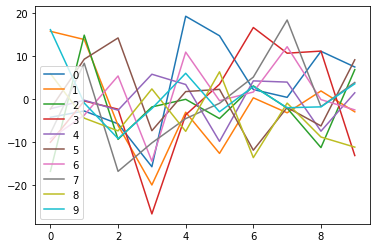

In [531]:
data_df = pd.DataFrame(published_data)
data_df.plot(), data_df

<AxesSubplot:>

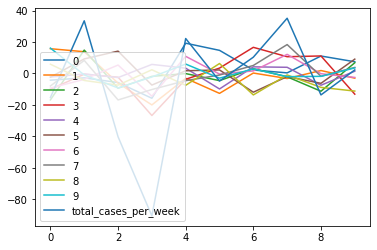

In [532]:
data_df["total_cases_per_week"] = data_df.sum(1)
data_df.plot()